In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader import DataReader
from datetime import datetime
from __future__ import division


In [4]:
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

In [5]:
GOOG = DataReader('GOOG','yahoo',start,end)
MSFT = DataReader('MSFT','yahoo',start,end)

In [6]:
AMZN = DataReader('AMZN','yahoo',start,end)


In [7]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,927.111421,932.969089,921.341079,927.838300,927.838300,1.469109e+06
std,79.020587,80.376678,78.353580,79.431587,79.431587,6.370170e+05
min,793.799988,801.190002,790.520020,795.695007,795.695007,5.370000e+05
25%,842.880005,844.909973,839.320007,841.650024,841.650024,1.086500e+06
50%,931.469971,936.530029,924.590027,930.599976,930.599976,1.279500e+06
75%,980.000000,985.424988,972.200012,977.000000,977.000000,1.620500e+06
max,1109.400024,1111.270020,1101.619995,1106.939941,1106.939941,5.167700e+06


In [8]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-09,806.400024,809.966003,802.830017,806.650024,806.650024,1272400
2017-01-10,807.859985,809.130005,803.510010,804.789978,804.789978,1176800
2017-01-11,805.000000,808.150024,801.369995,807.909973,807.909973,1065900
2017-01-12,807.140015,807.390015,799.169983,806.359985,806.359985,1353100
2017-01-13,807.479980,811.223999,806.690002,807.880005,807.880005,1099200


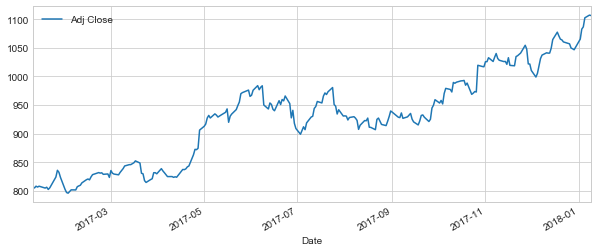

In [9]:
#Visualization for the adjusted closing price
GOOG['Adj Close'].plot(legend = True,figsize = (10,4))


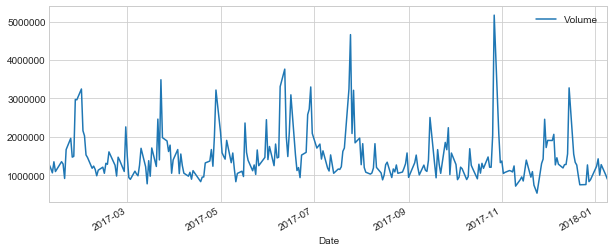

In [10]:
#Shows the volume of stocks traded every day
GOOG['Volume'].plot(legend = True,figsize=(10,4))

In [11]:
#Calculating Moving averages over time duration 
#of 10,20 and 50 days
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    GOOG[column_name]=pd.rolling_mean(GOOG['Adj Close'],ma)

C:\Users\capiot\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  
C:\Users\capiot\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  
C:\Users\capiot\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  


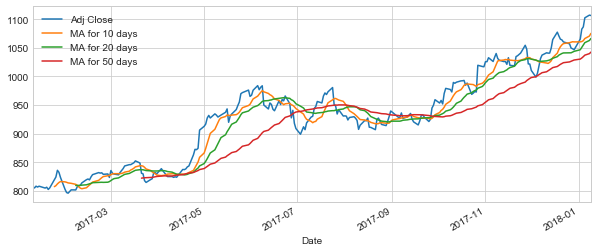

In [12]:
GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = False, figsize = (10,4))

In [13]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2017-01-09 to 2018-01-09
Data columns (total 9 columns):
Open              253 non-null float64
High              253 non-null float64
Low               253 non-null float64
Close             253 non-null float64
Adj Close         253 non-null float64
Volume            253 non-null int64
MA for 10 days    244 non-null float64
MA for 20 days    234 non-null float64
MA for 50 days    204 non-null float64
dtypes: float64(8), int64(1)
memory usage: 19.8 KB


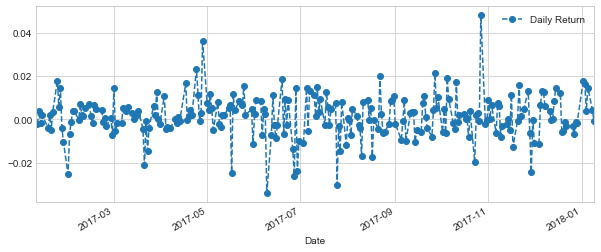

In [14]:
#percentage change calculates change in Adjusted Closing rates of everyday
#Thus calculating the total gain or loss for the day

GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
GOOG['Daily Return'].plot(figsize = (10,4),legend = True,linestyle='--',marker = 'o')

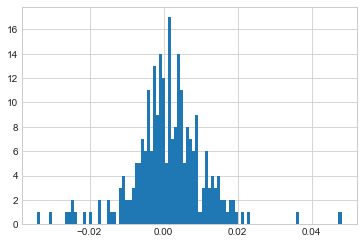

In [15]:
#Histogram plots frequency of returns 
#Ex : Zero returns for 16 times
GOOG['Daily Return'].hist(bins = 100)

In [17]:
GOOG['Daily Return']

Date
2017-01-09         NaN
2017-01-10   -0.002306
2017-01-11    0.003877
2017-01-12   -0.001919
2017-01-13    0.001885
2017-01-17   -0.004048
2017-01-18    0.001815
2017-01-19   -0.004832
2017-01-20    0.003547
2017-01-23    0.017751
2017-01-24    0.005566
2017-01-25    0.014323
2017-01-26   -0.004212
2017-01-27   -0.010623
2017-01-30   -0.025495
2017-01-31   -0.006893
2017-02-01   -0.001374
2017-02-02    0.003563
2017-02-03    0.003707
2017-02-06   -0.000187
2017-02-07    0.007026
2017-02-08    0.001747
2017-02-09    0.001460
2017-02-10    0.005077
2017-02-13    0.006846
2017-02-14    0.001477
2017-02-15   -0.001792
2017-02-16    0.006325
2017-02-17    0.004744
2017-02-21    0.004335
                ...   
2017-11-27    0.013069
2017-11-28   -0.006450
2017-11-29   -0.024585
2017-11-30   -0.000245
2017-12-01   -0.011004
2017-12-04   -0.011374
2017-12-05    0.006479
2017-12-06    0.013162
2017-12-07    0.012324
2017-12-08    0.005936
2017-12-11    0.003905
2017-12-12   -0.000596
2017-1

In [20]:
tech_list = ['GOOG','AMZN','MSFT']

In [21]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [23]:
closing_df.head()

,AMZN,GOOG,MSFT
Date,,,
2018-01-09,1252.699951,1106.260010,88.220001
2018-01-08,1246.869995,1106.939941,88.279999
2018-01-05,1229.140015,1102.229980,88.190002
2018-01-04,1209.589966,1086.400024,87.110001
2018-01-03,1204.199951,1082.479980,86.349998


In [26]:
tech_rets = closing_df.pct_change()

In [27]:
tech_rets.head()

,AMZN,GOOG,MSFT
Date,,,
2018-01-09,NaN,NaN,NaN
2018-01-08,-0.004654,0.000615,0.000680
2018-01-05,-0.014220,-0.004255,-0.001019
2018-01-04,-0.015905,-0.014362,-0.012246
2018-01-03,-0.004456,-0.003608,-0.008725


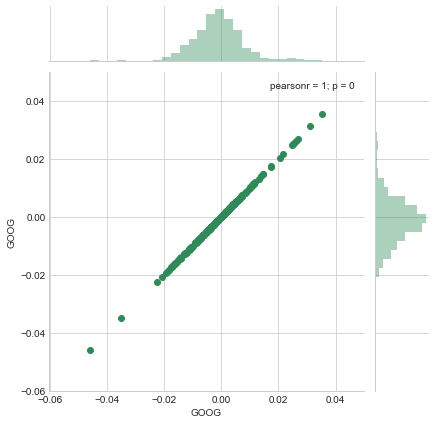

In [28]:
#Compare Daily Returns of two stocks
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color='seagreen')

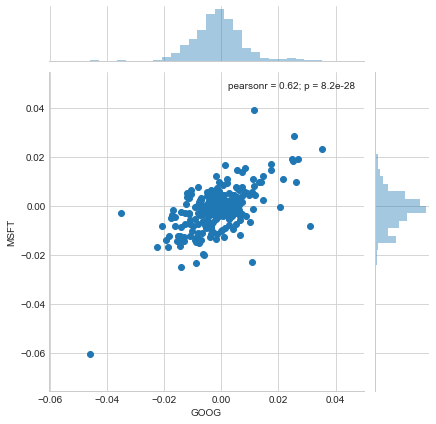

In [29]:
sns.jointplot('GOOG','MSFT',tech_rets,kind = 'scatter')

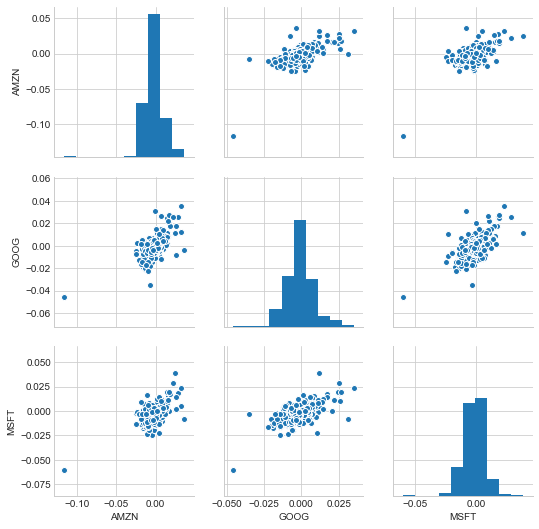

In [30]:
#In order to compare all stocks of techlist
#there is plot named pairplot
sns.pairplot(tech_rets.dropna())

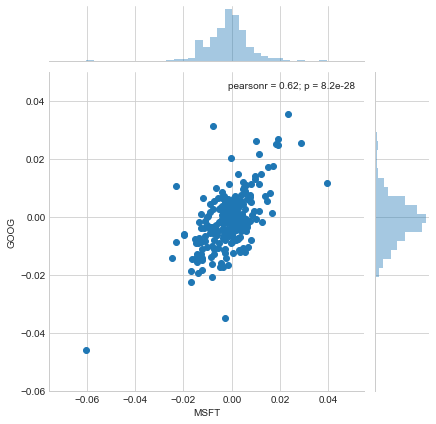

In [31]:
sns.jointplot('MSFT','GOOG',tech_rets)

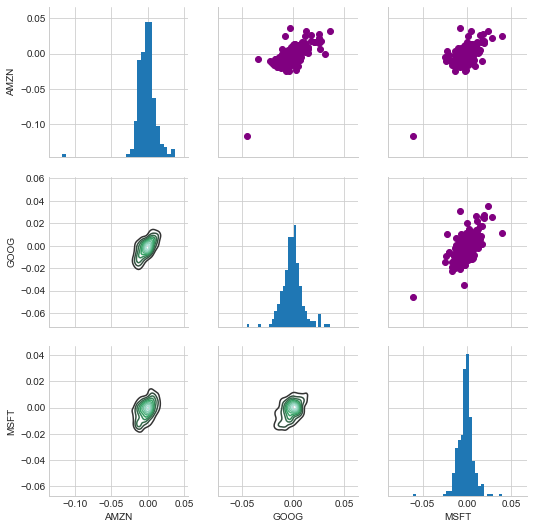

In [35]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color = 'purple')
returns_fig.map_lower(sns.kdeplot,color = 'cool_map')
returns_fig.map_diag(plt.hist,bins = 30)

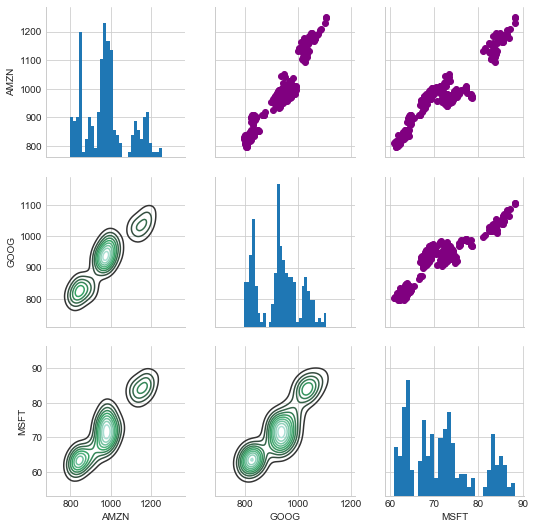

In [36]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color = 'purple')
returns_fig.map_lower(sns.kdeplot,color = 'cool_map')
returns_fig.map_diag(plt.hist,bins = 30)

In [37]:
sns.corrplot(tech_rets.dropna(),annot=True)

AttributeError: module 'seaborn' has no attribute 'corrplot'

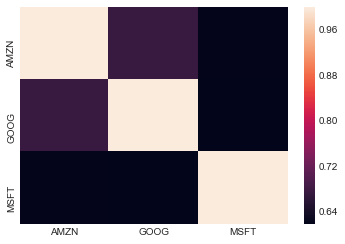

In [41]:
corr = tech_rets.corr()
sns.heatmap(corr)

In [42]:
rets = tech_rets.dropna()

In [43]:
rets['GOOG'].quantile(0.05)

-0.015278702322782424